# Scalability of *in situ* backpropagation

In this notebook, we explore the scalability of *in situ* backpropagation as it pertains to the tradeoff between noise and energy efficiency and latency of photonic devices. 
- As far as scalability of the photonic advantage, we do our best to incorporate all of the different elements that contribute to the total energy consumption in the hybrid photonic neural network design, dominated by optoelectronic conversions and signal amplification, and any assumptions for this calculation are provided in the main text and/or Supplementary Material of the paper.
- As far as noise error scaling, we explore the tradeoffs of various errors (e.g., systematic in the various photonic elements and random noise at the photodetector). We then perform large-scale simulations on MNIST data to show that realistic problems can be solved using our approach in the presence of error.



In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
pip install simphox

Note: you may need to restart the kernel to use updated packages.


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
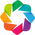

[CpuDevice(id=0)]

In [4]:
from simphox.circuit import rectangular
from simphox.utils import random_unitary
from jax import jit
import jax
import numpy as np
import jax.numpy as jnp
from mlflow import log_metric, log_param, log_artifacts
import wandb

import holoviews as hv
hv.extension('bokeh')

from dataclasses import dataclass

jax.config.update('jax_platform_name', 'cpu')  # change to cpu if not using gpu (slower!)
jax.config.update("jax_enable_x64", False)
jax.devices()

In [5]:
mesh = rectangular(random_unitary(256).astype(np.complex64)) # use this object to get the necessary functions
mesh_0 = mesh
mesh_1 = rectangular(random_unitary(256).astype(np.complex64))
mesh_2 = rectangular(random_unitary(256).astype(np.complex64))

In [7]:
from PIL import Image, ImageFilter
data_file_path = "/Users/matthewho/Photonic_computing/simphox-notebooks/aircraft/fgvc-aircraft-2013b/data"

In [8]:
y_train_path = data_file_path + "/images_manufacturer_train.txt"
y_test_path = data_file_path + "/images_manufacturer_test.txt"

def populate_set(path):
    manufacturer_dict = dict()
    with open(path, 'r') as file:
        for line in file:
            line = line.strip().split()
            if len(line) == 2:
                key = line[0]
                value = line[1]
                manufacturer_dict[key] = value
    return manufacturer_dict

y_train_dict = populate_set(y_train_path)
y_test_dict = populate_set(y_test_path)

In [9]:
print(f"number of training examples: {len(y_train_dict)}")
print(f"number of test examples: {len(y_test_dict)}")

number of training examples: 2367
number of test examples: 2368


In [10]:
# one hot encode the manufacturers
possible_labels = sorted(list(set(y_train_dict.values())))
print(possible_labels)
num_manufacturers = len(possible_labels)

one_hot_dict = {}
for manufacturer_idx in range(len(possible_labels)):
    one_hot_dict[possible_labels[manufacturer_idx]] = np.zeros(num_manufacturers)
    one_hot_dict[possible_labels[manufacturer_idx]][manufacturer_idx] = 1
# for key, value in one_hot_dict.items():
#     print(f"manufacturer: {key} and corresponding array: {value}")

['ATR', 'Airbus', 'Antonov', 'Beechcraft', 'Boeing', 'Canadair', 'Cessna', 'Dornier', 'Embraer', 'Eurofighter', 'Fairchild', 'Fokker', 'Ilyushin', 'Panavia', 'Piper', 'Robin', 'Saab', 'Supermarine', 'Tupolev', 'Yakovlev']


In [11]:
num_train_examples = len(y_train_dict)
num_test_examples = len(y_test_dict)

In [12]:
from utils import norm_inputs

x_train_raw = np.zeros((len(y_train_dict), 256, 256))
x_train = np.zeros((len(y_train_dict), 256))
x_test_raw = np.zeros((len(y_test_dict), 256, 256))
x_test = np.zeros((len(y_test_dict), 256))
y_train = np.zeros((len(y_train_dict), num_manufacturers))
y_test = np.zeros((len(y_test_dict), num_manufacturers))


def populate():
    def populate_dataset(label_dict, data, labels):
        counter = 0
        for img_num in label_dict.keys():
            path = f"/Users/matthewho/Photonic_computing/simphox-notebooks/aircraft/fgvc-aircraft-2013b/data/images/{img_num}.jpg"
            img = Image.open(path)
            img = img.convert('L')                                  # grayscale
            width, height = img.size
            cropped_img = img.crop((0, 0, width, height - 20))        # crop the copyright
            filtered_img = cropped_img.filter(ImageFilter.GaussianBlur(radius = 5))    # not sure what to put as SD, putting 5 for now
            downsampled_img = filtered_img.resize((256, 256))         # downsample to 256 x 256
            data[counter, :, :] = downsampled_img                     # add to x_train
            labels[counter,:] = one_hot_dict[label_dict[img_num]]     # add correct label
            counter += 1
    populate_dataset(y_train_dict, x_train_raw, y_train)
    populate_dataset(y_test_dict, x_test_raw, y_test)
    
def fourier(freq_radius):
    min_r, max_r = 128 - freq_radius, 128 + freq_radius
    x_train_ft = np.fft.fftshift(np.fft.fft2(x_train_raw), axes=(1, 2))
    x_test_ft = np.fft.fftshift(np.fft.fft2(x_test_raw), axes=(1, 2))
    x_train_ft = x_train_ft[:, min_r:max_r, min_r:max_r]
    x_test_ft = x_test_ft[:, min_r:max_r, min_r:max_r]
    print(x_train_ft.shape)
    
    x_train = norm_inputs(x_train_ft.reshape((len(y_train_dict), -1))).astype(np.complex64)
    x_test = norm_inputs(x_test_ft.reshape(len(y_test_dict), -1)).astype(np.complex64)
    return x_train, x_test

populate()
x_train, x_test = fourier(8)

(2367, 16, 16)


In [13]:
print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_test: {y_test.shape}")

x_train: (2367, 256)
y_train: (2367, 20)
x_test: (2368, 256)
y_test: (2368, 20)


In [14]:
# randomize order of images

train_perm = np.random.permutation(x_train.shape[0])
x_train = x_train[train_perm]
y_train = y_train[train_perm]
test_perm = np.random.permutation(x_test.shape[0])
x_test = x_test[test_perm]
y_test = y_test[test_perm]

# JIT function with benchmarking

In [15]:
# fn = jit(mesh.propagate_matrix_fn(use_jax=False, explicit=False))
prop_jit = jit(mesh.propagate_matrix_fn(use_jax=True, explicit=True))
prop = mesh.propagate_matrix_fn(use_jax=False, explicit=True)
print('Compiling...')
%time prop_jit()
print('Done!')
print('JAX+JIT:')
%timeit prop_jit(mesh.params)
print('Numpy:')
%timeit prop(mesh.params)

Compiling...
CPU times: user 1.58 s, sys: 198 ms, total: 1.78 s
Wall time: 1.53 s
Done!
JAX+JIT:
338 ms ± 6.57 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Numpy:
597 ms ± 38.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
from jax import grad

matrix_fn = mesh.matrix_fn(use_jax=True)
# in_situ_matrix_fn = mesh.in_situ_matrix_fn(all_analog=True)
ones = jnp.ones(256, dtype=jnp.complex64)
from jax import vjp
tr = lambda u: jnp.abs(u[0, 0]) ** 2
fn = lambda params: tr(matrix_fn(params))
fn_jit = jit(fn)
# in_situ_fn = lambda params: tr(in_situ_matrix_fn(params))
# in_situ_fn_jit = jit(in_situ_fn)

grad_fn = grad(fn)
# grad_in_situ_fn = grad(in_situ_fn)
grad_fn_jit = grad(fn_jit)
# grad_in_situ_fn_jit = grad(in_situ_fn_jit)

print('Compiling regular...')
%time grad_fn_jit(mesh.params)
print('Done!')
print('Post-compilation JIT:')
%timeit grad_fn_jit(mesh.params)
print('No JIT:')
%timeit grad_fn(mesh.params)

# print('Compiling in situ...')
# %time grad_in_situ_fn_jit(mesh.params)
# print('Done!')
# print('Post-compilation JIT:')
# %timeit grad_in_situ_fn_jit(mesh.params)
# print('No JIT:')
# %timeit grad_in_situ_fn(mesh.params)

Compiling regular...
CPU times: user 1.18 s, sys: 66.8 ms, total: 1.25 s
Wall time: 1.14 s
Done!
Post-compilation JIT:
302 ms ± 1.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
No JIT:
979 ms ± 20.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Pure JAX ONN

Implementation of an ONN in JAX using `simphox` and relevant benchmarking.

In [30]:
from jax.scipy.special import logsumexp
from jax import vmap, vjp

def dropout_softmax(outputs, num_classes: int = 20):
    return jax.nn.log_softmax(outputs[:num_classes]).astype(jnp.float32)

# in_situ_matrix_fn = (mesh.in_situ_matrix_fn(all_analog=True))
matrix_fn = jit(mesh.matrix_fn(use_jax=True))

def aircraft_onn(params, inputs):
    # per-example predictions
    outputs = inputs
    for param in params:
        outputs = jnp.abs(matrix_fn(param, outputs))[:, 0] + 0j
    outputs = jnp.abs(outputs) ** 2
    return dropout_softmax(outputs, 20)

batched_aircraft_onn = vmap(aircraft_onn, in_axes=(None, 0))

In [18]:
@jit
def batch_loss(params, inputs, targets):
    preds = batched_aircraft_onn(params, inputs)
    return -jnp.mean(preds.squeeze() * targets).real

@jit
def loss(params, inputs, targets):
    preds = aircraft_onn(params, inputs)
    return -jnp.mean(preds.squeeze() * targets).real

print('Defining initial params...')
init_params = [mesh_0.params, mesh_1.params, mesh_2.params]

print('Compiling batch loss grad...')
%time grads = grad(batch_loss)(init_params, jnp.array(x_train[:30]).astype(np.complex64), jnp.array(y_train[:30]).astype(np.float32))
print('Benchmarking batch loss grad...')
%timeit grads = grad(batch_loss)(init_params, jnp.array(x_train[:30]).astype(np.complex64), jnp.array(y_train[:30]).astype(np.float32))

print('Compiling single loss grad...')
%time grads = grad(loss)(init_params, jnp.array(x_train[0]).astype(np.complex64), jnp.array(y_train[0]).astype(np.float32))
print('Benchmarking single loss grad...')
%timeit grads = grad(loss)(init_params, jnp.array(x_train[0]).astype(np.complex64), jnp.array(y_train[0]).astype(np.float32))

Defining initial params...
Compiling batch loss grad...
inputs: Traced<ShapedArray(complex64[256])>with<BatchTrace(level=4/0)> with
  val = Traced<ShapedArray(complex64[30,256])>with<DynamicJaxprTrace(level=3/0)>
  batch_dim = 0
CPU times: user 2.68 s, sys: 51.4 ms, total: 2.73 s
Wall time: 2.62 s
Benchmarking batch loss grad...
279 ms ± 2.85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Compiling single loss grad...
inputs: Traced<ShapedArray(complex64[256])>with<DynamicJaxprTrace(level=3/0)>
CPU times: user 2.13 s, sys: 36 ms, total: 2.16 s
Wall time: 2.05 s
Benchmarking single loss grad...
137 ms ± 294 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Training 3-layer pure JAX ONN on MNIST

In [19]:
from jax.example_libraries.optimizers import adam
from tqdm.notebook import tqdm as pbar
from jax import value_and_grad
x_train = jnp.array(x_train).astype(np.complex64)
y_train = jnp.array(y_train).astype(np.float32)

In [20]:
num_train = x_train.shape[0]
num_test = x_test.shape[0]
print(f"num_train: {num_train}")
print(f"num_test: {num_test}")

num_train: 2367
num_test: 2368


In [32]:
import matplotlib.pyplot as plt

  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 1: accuracy is 0.1963682472705841


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 2: accuracy is 0.17609797418117523


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 3: accuracy is 0.1896114945411682


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 4: accuracy is 0.23226352035999298


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 5: accuracy is 0.2668918967247009


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 6: accuracy is 0.20439189672470093


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 7: accuracy is 0.24746622145175934


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 8: accuracy is 0.22972974181175232


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 9: accuracy is 0.2119932472705841


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 10: accuracy is 0.2567567527294159


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 11: accuracy is 0.19805744290351868


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 12: accuracy is 0.2179054170846939


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 13: accuracy is 0.28758445382118225


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 14: accuracy is 0.13978040218353271


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 15: accuracy is 0.2723817527294159


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 16: accuracy is 0.23944257199764252


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 17: accuracy is 0.23606419563293457


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 18: accuracy is 0.296875


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 19: accuracy is 0.1993243247270584


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 20: accuracy is 0.19510135054588318


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 21: accuracy is 0.1875


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 22: accuracy is 0.2284628450870514


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 23: accuracy is 0.22635135054588318


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 24: accuracy is 0.20819257199764252


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 25: accuracy is 0.2706925868988037


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 26: accuracy is 0.23606419563293457


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 27: accuracy is 0.18412162363529205


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 28: accuracy is 0.23902027308940887


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 29: accuracy is 0.21537162363529205


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 30: accuracy is 0.23395270109176636


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 31: accuracy is 0.21917229890823364


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 32: accuracy is 0.25253379344940186


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 33: accuracy is 0.23859797418117523


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 34: accuracy is 0.22508446872234344


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 35: accuracy is 0.23690879344940186


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 36: accuracy is 0.26224663853645325


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 37: accuracy is 0.2069256752729416


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 38: accuracy is 0.2305743247270584


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 39: accuracy is 0.23310811817646027


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 40: accuracy is 0.2179054170846939


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 41: accuracy is 0.31714528799057007


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 42: accuracy is 0.2597128450870514


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 43: accuracy is 0.23226352035999298


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 44: accuracy is 0.18496622145175934


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 45: accuracy is 0.16680744290351868


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 46: accuracy is 0.21832770109176636


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 47: accuracy is 0.26309123635292053


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 48: accuracy is 0.23015202581882477


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 49: accuracy is 0.2799831032752991


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 50: accuracy is 0.21748311817646027


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 51: accuracy is 0.2255067676305771


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 52: accuracy is 0.29138514399528503


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 53: accuracy is 0.27027028799057007


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 54: accuracy is 0.265625


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 55: accuracy is 0.22001689672470093


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 56: accuracy is 0.27956080436706543


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 57: accuracy is 0.2774493396282196


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 58: accuracy is 0.21241554617881775


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 59: accuracy is 0.21157094836235046


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 60: accuracy is 0.28378379344940186


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 61: accuracy is 0.24577702581882477


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 62: accuracy is 0.3036317527294159


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 63: accuracy is 0.21706081926822662


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 64: accuracy is 0.2723817527294159


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 65: accuracy is 0.23986487090587616


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 66: accuracy is 0.22043919563293457


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 67: accuracy is 0.2799831032752991


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 68: accuracy is 0.2305743247270584


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 69: accuracy is 0.24239864945411682


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 70: accuracy is 0.26309123635292053


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 71: accuracy is 0.23902027308940887


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 72: accuracy is 0.27111488580703735


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 73: accuracy is 0.18285472691059113


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 74: accuracy is 0.23226352035999298


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 75: accuracy is 0.2052364945411682


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 76: accuracy is 0.21157094836235046


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 77: accuracy is 0.20101352035999298


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 78: accuracy is 0.21072635054588318


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 79: accuracy is 0.21072635054588318


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 80: accuracy is 0.20439189672470093


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 81: accuracy is 0.22423987090587616


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 82: accuracy is 0.24451014399528503


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 83: accuracy is 0.15962837636470795


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 84: accuracy is 0.17271959781646729


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 85: accuracy is 0.17060811817646027


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 86: accuracy is 0.18876689672470093


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 87: accuracy is 0.1524493247270584


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 88: accuracy is 0.18327702581882477


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 89: accuracy is 0.12119932472705841


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 90: accuracy is 0.14907094836235046


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 91: accuracy is 0.14231419563293457


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 92: accuracy is 0.19087837636470795


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 93: accuracy is 0.21832770109176636


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 94: accuracy is 0.11486487090587616


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 95: accuracy is 0.13429054617881775


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 96: accuracy is 0.19510135054588318


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 97: accuracy is 0.17271959781646729


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 98: accuracy is 0.16173987090587616


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 99: accuracy is 0.171875


  0%|          | 0/147 [00:00<?, ?it/s]

Batch size 16, epoch 100: accuracy is 0.16680744290351868


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 1: accuracy is 0.17060811817646027


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 2: accuracy is 0.2461993247270584


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 3: accuracy is 0.2609797418117523


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 4: accuracy is 0.27491554617881775


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 5: accuracy is 0.28842905163764954


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 6: accuracy is 0.28969594836235046


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 7: accuracy is 0.29265204071998596


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 8: accuracy is 0.2947635352611542


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 9: accuracy is 0.29054054617881775


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 10: accuracy is 0.2753378450870514


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 11: accuracy is 0.28167229890823364


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 12: accuracy is 0.2947635352611542


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 13: accuracy is 0.29856419563293457


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 14: accuracy is 0.30532094836235046


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 15: accuracy is 0.30996623635292053


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 16: accuracy is 0.3103885352611542


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 17: accuracy is 0.30827704071998596


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 18: accuracy is 0.30616554617881775


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 19: accuracy is 0.31418919563293457


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 20: accuracy is 0.29729729890823364


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 21: accuracy is 0.29940879344940186


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 22: accuracy is 0.2888513505458832


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 23: accuracy is 0.2871621549129486


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 24: accuracy is 0.28462839126586914


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 25: accuracy is 0.28125


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 26: accuracy is 0.2791385054588318


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 27: accuracy is 0.28462839126586914


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 28: accuracy is 0.28842905163764954


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 29: accuracy is 0.29856419563293457


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 30: accuracy is 0.29856419563293457


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 31: accuracy is 0.3112331032752991


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 32: accuracy is 0.3036317527294159


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 33: accuracy is 0.2820945978164673


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 34: accuracy is 0.27111488580703735


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 35: accuracy is 0.2782939374446869


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 36: accuracy is 0.2461993247270584


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 37: accuracy is 0.2736486494541168


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 38: accuracy is 0.2605574429035187


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 39: accuracy is 0.25633445382118225


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 40: accuracy is 0.25


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 41: accuracy is 0.23986487090587616


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 42: accuracy is 0.2609797418117523


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 43: accuracy is 0.25929054617881775


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 44: accuracy is 0.2491554170846939


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 45: accuracy is 0.2647804021835327


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 46: accuracy is 0.2432432472705841


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 47: accuracy is 0.2529560923576355


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 48: accuracy is 0.25929054617881775


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 49: accuracy is 0.3065878450870514


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 50: accuracy is 0.26604729890823364


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 51: accuracy is 0.27027028799057007


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 52: accuracy is 0.3146114945411682


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 53: accuracy is 0.2960304021835327


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 54: accuracy is 0.2609797418117523


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 55: accuracy is 0.2888513505458832


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 56: accuracy is 0.32263514399528503


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 57: accuracy is 0.3086993396282196


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 58: accuracy is 0.3036317527294159


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 59: accuracy is 0.28673988580703735


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 60: accuracy is 0.3230574429035187


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 61: accuracy is 0.32474663853645325


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 62: accuracy is 0.32390204071998596


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 63: accuracy is 0.3268581032752991


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 64: accuracy is 0.31418919563293457


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 65: accuracy is 0.3103885352611542


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 66: accuracy is 0.32981419563293457


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 67: accuracy is 0.3167229890823364


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 68: accuracy is 0.2909628450870514


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 69: accuracy is 0.2888513505458832


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 70: accuracy is 0.3323479890823364


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 71: accuracy is 0.3137668967247009


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 72: accuracy is 0.3057432472705841


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 73: accuracy is 0.3154560923576355


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 74: accuracy is 0.296875


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 75: accuracy is 0.30616554617881775


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 76: accuracy is 0.30616554617881775


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 77: accuracy is 0.2930743396282196


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 78: accuracy is 0.29729729890823364


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 79: accuracy is 0.30025339126586914


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 80: accuracy is 0.29265204071998596


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 81: accuracy is 0.2892736494541168


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 82: accuracy is 0.2981418967247009


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 83: accuracy is 0.2956081032752991


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 84: accuracy is 0.29518580436706543


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 85: accuracy is 0.296875


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 86: accuracy is 0.2909628450870514


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 87: accuracy is 0.29054054617881775


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 88: accuracy is 0.2977195978164673


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 89: accuracy is 0.2850506901741028


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 90: accuracy is 0.31883445382118225


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 91: accuracy is 0.32094594836235046


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 92: accuracy is 0.33361488580703735


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 93: accuracy is 0.3243243396282196


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 94: accuracy is 0.3205236494541168


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 95: accuracy is 0.32179054617881775


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 96: accuracy is 0.3027871549129486


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 97: accuracy is 0.3006756901741028


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 98: accuracy is 0.28969594836235046


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 99: accuracy is 0.28969594836235046


  0%|          | 0/73 [00:00<?, ?it/s]

Batch size 32, epoch 100: accuracy is 0.2901182472705841


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 1: accuracy is 0.1972128450870514


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 2: accuracy is 0.2736486494541168


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 3: accuracy is 0.27491554617881775


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 4: accuracy is 0.2850506901741028


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 5: accuracy is 0.29434123635292053


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 6: accuracy is 0.29518580436706543


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 7: accuracy is 0.296875


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 8: accuracy is 0.2960304021835327


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 9: accuracy is 0.3006756901741028


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 10: accuracy is 0.2981418967247009


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 11: accuracy is 0.3010979890823364


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 12: accuracy is 0.30236488580703735


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 13: accuracy is 0.3036317527294159


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 14: accuracy is 0.30616554617881775


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 15: accuracy is 0.30616554617881775


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 16: accuracy is 0.3074324429035187


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 17: accuracy is 0.3086993396282196


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 18: accuracy is 0.3095439374446869


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 19: accuracy is 0.31081080436706543


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 20: accuracy is 0.31081080436706543


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 21: accuracy is 0.31207770109176636


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 22: accuracy is 0.3116554021835327


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 23: accuracy is 0.31292229890823364


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 24: accuracy is 0.3133445978164673


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 25: accuracy is 0.3201013505458832


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 26: accuracy is 0.32179054617881775


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 27: accuracy is 0.3205236494541168


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 28: accuracy is 0.3192567527294159


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 29: accuracy is 0.318412184715271


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 30: accuracy is 0.32179054617881775


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 31: accuracy is 0.32179054617881775


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 32: accuracy is 0.32559123635292053


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 33: accuracy is 0.32094594836235046


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 34: accuracy is 0.3243243396282196


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 35: accuracy is 0.328125


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 36: accuracy is 0.32390204071998596


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 37: accuracy is 0.3319256901741028


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 38: accuracy is 0.32981419563293457


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 39: accuracy is 0.33277028799057007


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 40: accuracy is 0.3319256901741028


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 41: accuracy is 0.33445945382118225


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 42: accuracy is 0.33361488580703735


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 43: accuracy is 0.33530405163764954


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 44: accuracy is 0.3302364945411682


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 45: accuracy is 0.3369932472705841


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 46: accuracy is 0.3357263505458832


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 47: accuracy is 0.3319256901741028


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 48: accuracy is 0.33150339126586914


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 49: accuracy is 0.334037184715271


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 50: accuracy is 0.33361488580703735


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 51: accuracy is 0.33361488580703735


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 52: accuracy is 0.3331925868988037


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 53: accuracy is 0.3348817527294159


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 54: accuracy is 0.3357263505458832


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 55: accuracy is 0.3361486494541168


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 56: accuracy is 0.3348817527294159


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 57: accuracy is 0.33657094836235046


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 58: accuracy is 0.3369932472705841


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 59: accuracy is 0.33826014399528503


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 60: accuracy is 0.3369932472705841


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 61: accuracy is 0.32770270109176636


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 62: accuracy is 0.32263514399528503


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 63: accuracy is 0.3192567527294159


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 64: accuracy is 0.3192567527294159


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 65: accuracy is 0.31967905163764954


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 66: accuracy is 0.318412184715271


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 67: accuracy is 0.3163006901741028


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 68: accuracy is 0.31418919563293457


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 69: accuracy is 0.3116554021835327


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 70: accuracy is 0.31207770109176636


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 71: accuracy is 0.3125


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 72: accuracy is 0.3154560923576355


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 73: accuracy is 0.31967905163764954


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 74: accuracy is 0.31883445382118225


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 75: accuracy is 0.3116554021835327


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 76: accuracy is 0.3048986494541168


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 77: accuracy is 0.2981418967247009


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 78: accuracy is 0.2998310923576355


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 79: accuracy is 0.29856419563293457


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 80: accuracy is 0.296875


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 81: accuracy is 0.3095439374446869


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 82: accuracy is 0.3074324429035187


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 83: accuracy is 0.29729729890823364


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 84: accuracy is 0.2871621549129486


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 85: accuracy is 0.28082770109176636


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 86: accuracy is 0.2753378450870514


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 87: accuracy is 0.2723817527294159


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 88: accuracy is 0.2744932472705841


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 89: accuracy is 0.2863175868988037


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 90: accuracy is 0.2799831032752991


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 91: accuracy is 0.2766047418117523


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 92: accuracy is 0.27280405163764954


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 93: accuracy is 0.2643581032752991


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 94: accuracy is 0.24577702581882477


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 95: accuracy is 0.2871621549129486


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 96: accuracy is 0.3399493396282196


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 97: accuracy is 0.3154560923576355


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 98: accuracy is 0.3268581032752991


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 99: accuracy is 0.3386824429035187


  0%|          | 0/36 [00:00<?, ?it/s]

Batch size 64, epoch 100: accuracy is 0.31798988580703735


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 1: accuracy is 0.1934121698141098


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 2: accuracy is 0.2901182472705841


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 3: accuracy is 0.22423987090587616


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 4: accuracy is 0.27027028799057007


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 5: accuracy is 0.27027028799057007


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 6: accuracy is 0.25633445382118225


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 7: accuracy is 0.24788852035999298


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 8: accuracy is 0.2440878450870514


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 9: accuracy is 0.25548988580703735


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 10: accuracy is 0.2643581032752991


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 11: accuracy is 0.2732263505458832


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 12: accuracy is 0.27871623635292053


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 13: accuracy is 0.28082770109176636


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 14: accuracy is 0.2842060923576355


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 15: accuracy is 0.28673988580703735


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 16: accuracy is 0.28842905163764954


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 17: accuracy is 0.2947635352611542


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 18: accuracy is 0.29349663853645325


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 19: accuracy is 0.2930743396282196


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 20: accuracy is 0.29856419563293457


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 21: accuracy is 0.29856419563293457


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 22: accuracy is 0.30025339126586914


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 23: accuracy is 0.2998310923576355


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 24: accuracy is 0.3019425868988037


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 25: accuracy is 0.3006756901741028


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 26: accuracy is 0.2998310923576355


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 27: accuracy is 0.2998310923576355


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 28: accuracy is 0.2998310923576355


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 29: accuracy is 0.2998310923576355


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 30: accuracy is 0.30320945382118225


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 31: accuracy is 0.3027871549129486


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 32: accuracy is 0.30320945382118225


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 33: accuracy is 0.30152028799057007


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 34: accuracy is 0.3010979890823364


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 35: accuracy is 0.2998310923576355


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 36: accuracy is 0.3036317527294159


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 37: accuracy is 0.3027871549129486


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 38: accuracy is 0.30405405163764954


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 39: accuracy is 0.3048986494541168


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 40: accuracy is 0.3065878450870514


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 41: accuracy is 0.3078547418117523


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 42: accuracy is 0.30616554617881775


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 43: accuracy is 0.3065878450870514


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 44: accuracy is 0.30912163853645325


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 45: accuracy is 0.30701014399528503


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 46: accuracy is 0.3095439374446869


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 47: accuracy is 0.31207770109176636


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 48: accuracy is 0.3133445978164673


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 49: accuracy is 0.3125


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 50: accuracy is 0.3154560923576355


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 51: accuracy is 0.31503379344940186


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 52: accuracy is 0.31418919563293457


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 53: accuracy is 0.31798988580703735


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 54: accuracy is 0.31714528799057007


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 55: accuracy is 0.3154560923576355


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 56: accuracy is 0.3133445978164673


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 57: accuracy is 0.3133445978164673


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 58: accuracy is 0.30701014399528503


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 59: accuracy is 0.3074324429035187


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 60: accuracy is 0.3010979890823364


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 61: accuracy is 0.30025339126586914


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 62: accuracy is 0.3006756901741028


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 63: accuracy is 0.30152028799057007


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 64: accuracy is 0.3010979890823364


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 65: accuracy is 0.30236488580703735


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 66: accuracy is 0.3036317527294159


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 67: accuracy is 0.30532094836235046


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 68: accuracy is 0.30996623635292053


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 69: accuracy is 0.3154560923576355


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 70: accuracy is 0.3154560923576355


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 71: accuracy is 0.31714528799057007


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 72: accuracy is 0.3213682472705841


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 73: accuracy is 0.3230574429035187


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 74: accuracy is 0.32390204071998596


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 75: accuracy is 0.328125


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 76: accuracy is 0.33065879344940186


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 77: accuracy is 0.3293918967247009


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 78: accuracy is 0.3289695978164673


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 79: accuracy is 0.3302364945411682


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 80: accuracy is 0.3319256901741028


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 81: accuracy is 0.3289695978164673


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 82: accuracy is 0.33065879344940186


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 83: accuracy is 0.3293918967247009


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 84: accuracy is 0.3289695978164673


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 85: accuracy is 0.3293918967247009


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 86: accuracy is 0.328125


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 87: accuracy is 0.32770270109176636


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 88: accuracy is 0.32854729890823364


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 89: accuracy is 0.3293918967247009


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 90: accuracy is 0.3293918967247009


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 91: accuracy is 0.32854729890823364


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 92: accuracy is 0.3293918967247009


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 93: accuracy is 0.33065879344940186


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 94: accuracy is 0.32854729890823364


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 95: accuracy is 0.3268581032752991


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 96: accuracy is 0.32643580436706543


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 97: accuracy is 0.32854729890823364


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 98: accuracy is 0.32981419563293457


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 99: accuracy is 0.32981419563293457


  0%|          | 0/18 [00:00<?, ?it/s]

Batch size 128, epoch 100: accuracy is 0.32854729890823364


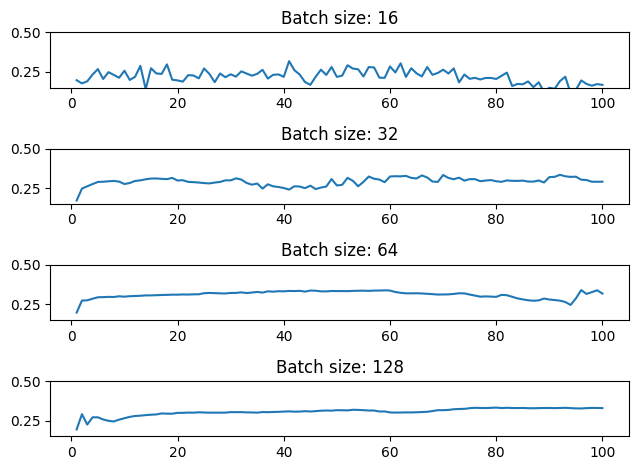

In [44]:

step_size = 0.001

opt_init, opt_update, get_params = adam(step_size=step_size)
init_params = [mesh_0.params, mesh_1.params, mesh_2.params]
init = opt_init(init_params)

def evaluate(params, images, targets):
    target_class = jnp.argmax(targets, axis=1)
    predicted_class = jnp.argmax(batched_aircraft_onn(params, images), axis=1)
    return jnp.mean(predicted_class == target_class)

def run_trial(batch_size, num_epochs):

    def update_fn(i, state):
        start = (i * batch_size) % num_train_examples
        stop = ((i + 1) * batch_size) % num_train_examples
        v, g = value_and_grad(batch_loss)(get_params(state), x_train[start:stop], y_train[start:stop])
        return v, opt_update(i, g, state)
    
    losses = []
    opt_state = init
    accuracies = []
    for epoch in range(num_epochs):
        iterator = pbar(range(num_train // batch_size))
        for i in iterator:
            v, opt_state = update_fn(i, opt_state)
            losses.append(v)
            iterator.set_description(f"𝓛: {v:.5f}")
        print(f"Batch size {batch_size}, epoch {epoch+1}: accuracy is {evaluate(get_params(opt_state), x_test, y_test).item()}")
        accuracies.append(evaluate(get_params(opt_state), x_test, y_test).item())
    return accuracies

num_epochs_test = 100
batch_sizes = [16, 32, 64, 128]

fig, axs = plt.subplots(len(batch_sizes), 1)
for idx in range(len(batch_sizes)):
    accuracies = run_trial(batch_sizes[idx], num_epochs_test)
    axs[idx].plot(range(1, num_epochs_test+1), accuracies)
    axs[idx].set_title(f"Batch size: {batch_sizes[idx]}")
    axs[idx].set_ylim(0.15, 0.5)

plt.tight_layout()
plt.show()

In [58]:
x_test = jnp.array(x_test).astype(np.complex64)
y_test = jnp.array(y_test).astype(np.float32)
batch_loss(get_params(opt_state), x_test, y_test)

Array(0.11186325, dtype=float32)

## JAX ONN using `haiku` and `optax`

Now that we've covered implementing a pure `jax` ONN simulation, let's consider moving the to `haiku` and `optax`, which allows us to leverage a similar interface as `keras` / `pytorch`. This is the method we use to train our hybrid photonic neural network.



In [ ]:
import haiku as hk
from simphox.circuit.forward import InSituBackpropLayer
import optax
from tqdm.notebook import tqdm as pbar

### Definitions

In [ ]:
from typing import Iterator, NamedTuple, Callable, List, Optional
from simphox.circuit import ForwardMesh
from utils import ONNData
from dataclasses import field
import wandb

class TrainingState(NamedTuple):
    params: hk.Params
    avg_params: hk.Params
    opt_state: optax.OptState

@dataclass
class HybridONNSimSpec:
    n: int = 64
    num_layers: int = 3
    init_seed: int = 42
    triangular: bool = False
    batch_size: int = 500
    learning_rate: float = 1e-3
    avg_param_step_size: float = 1e-2
    optimizer: str = "adam"
    error_args: dict = field(default_factory=dict)
    
    @property
    def config(self):
        return {
            "n": self.n,
            "num_layers": self.num_layers,
            "triangular": self.triangular,
            "learning_rate": self.learning_rate,
            "optimizer": self.optimizer,
            "batch_size": self.batch_size,
            "avg_param_step_size": self.avg_param_step_size,
            **self.error_args
        }
    
@dataclass
class HybridONNSim:
    init_state: TrainingState
    opt_state: TrainingState
    loss: Callable[[hk.Params, jnp.ndarray, jnp.ndarray], jnp.ndarray]
    evaluate: Callable[[hk.Params, jnp.ndarray, jnp.ndarray], jnp.ndarray]
    update: Callable[[TrainingState, jnp.ndarray, jnp.ndarray], TrainingState]
    run_epoch: Callable[[TrainingState], TrainingState]
    grad_error: Callable[[TrainingState], TrainingState]
    hyperparams: dict[str, float]

def dropout_softmax(outputs, num_classes: int = 10):
    return jax.nn.log_softmax(outputs[:num_classes]).astype(jnp.float32)


x_train = jnp.array(x_train).astype(np.complex64)
y_train = jnp.array(y_train).astype(np.float32)
x_test = jnp.array(x_test).astype(np.complex64)
y_test = jnp.array(y_test).astype(np.float32)


def make_mnist_onn(sim_spec: HybridONNSimSpec, perfect: bool = False) -> HybridONNSim:
    np.random.seed(sim_spec.init_seed)
    mesh_fn = triangular if sim_spec.triangular else rectangular
    meshes = [mesh_fn(random_unitary(sim_spec.n)) for _ in range(sim_spec.num_layers)]
    error_args = {} if perfect else sim_spec.error_args
    def onn(inputs):
        return dropout_softmax(
            jnp.abs(hk.Sequential([
                InSituBackpropLayer(mesh, activation=jnp.abs, name=f'layer{i}', **error_args)
                for i, mesh in enumerate(meshes)
            ])(inputs)).T ** 2, 10
        ).T
    onn_t = hk.without_apply_rng(hk.transform(onn))
    
    def onn_loss(inputs, labels):
        return -jnp.mean(onn(inputs).squeeze() * labels).real
    onn_l = hk.without_apply_rng(hk.transform(onn_loss))
    return onn_t, onn_l

    
def make_mnist_onn_run(sim_spec: HybridONNSimSpec) -> HybridONNSim:
    onn_t, onn_l = make_mnist_onn(sim_spec, perfect=False)
    onn_t_perfect, onn_l_perfect = make_mnist_onn(sim_spec, perfect=True)
    
    optimizer = optax.adam(sim_spec.learning_rate) if sim_spec.optimizer == "adam" else optax.sgd(sim_spec.learning_rate)

    @jax.jit
    def loss(params, inputs, labels):
        return onn_l.apply(params, inputs, labels) 

    @jax.jit
    def evaluate(params, inputs, labels):
        target_class = jnp.argmax(labels, axis=1)
        predicted_class = jnp.argmax(onn_t.apply(params, inputs), axis=1)
        return jnp.mean(predicted_class == target_class)
    
    @jax.jit
    def grad_error(state: TrainingState, inputs: jnp.ndarray, labels: jnp.ndarray):
        grads = jnp.hstack(jax.tree_util.tree_flatten(jax.grad(onn_l.apply)(state.params, inputs, labels))[0])
        grads_perfect = jnp.hstack(jax.tree_util.tree_flatten(jax.grad(onn_l_perfect.apply)(state.params, inputs, labels))[0])
        norm_perfect = jnp.sqrt(jnp.sum(grads_perfect ** 2))
        norm_imperfect = jnp.sqrt(jnp.sum(grads ** 2))
        return 1 - jnp.sum((grads * grads_perfect) / (norm_imperfect * norm_perfect))
    
    @jax.jit
    def update(state: TrainingState, inputs: jnp.ndarray, labels: jnp.ndarray) -> TrainingState:
        """Learning rule (stochastic gradient descent)."""
        grads = jax.grad(loss)(state.params, inputs, labels)
        updates, opt_state = optimizer.update(grads, state.opt_state)
        params = optax.apply_updates(state.params, updates)
        avg_params = optax.incremental_update(params, state.avg_params, step_size=sim_spec.avg_param_step_size)
        return TrainingState(params, avg_params, opt_state)
    
    init_params = onn_l.init(jax.random.PRNGKey(seed=42), x_train[:sim_spec.batch_size], y_train[:sim_spec.batch_size])
    init_state = TrainingState(init_params, init_params, optimizer.init(init_params))
    
    def run_epoch(state: TrainingState, partition: int = 0, num_partitions: int = 1) -> TrainingState:
        p, k = partition, x_train.shape[0] // num_partitions
        xt, yt = x_train[p * k:(p + 1) * k], y_train[p * k:(p + 1) * k]
        for i in range(xt.shape[0] // sim_spec.batch_size):
            state = update(
                state,
                xt[sim_spec.batch_size * i:sim_spec.batch_size * (i + 1)],
                yt[sim_spec.batch_size * i:sim_spec.batch_size * (i + 1)]
            )
        return state
    
    return HybridONNSim(
        init_state, init_state, loss,
        evaluate, update,
        run_epoch, grad_error,
        sim_spec.config
    )

In [ ]:
api = wandb.Api()
runs = api.runs('old-onn-notebook')
configs = [run.config for run in runs]

In [ ]:
import itertools

num_epochs = 100

iterator = pbar(list(
    itertools.product(
        (0, 0.025, 0.05), # io_amp_error_std
        (0, 0.025, 0.05), # io_phase_error_std
        (0, 0.05), # loss_db_std
        (0, 0.005, 0.01, 0.02), # tap_pd_shot_noise
        (600,), # batch_size
        ("sgd", "adam")
    )
))

LOG = True

# This loop runs the entire experiment for various batch sizes (the paper uses batch size 600 because it provides data the fastest and also leads to a better outcome).
for io_amp_error_std, io_phase_error_std, loss_db_std, tap_pd_shot_noise, batch_size, optimizer in iterator:
    num_partitions = {
        5: 50,
        30: 10,
        150: 2,
        600: 1
    }
    onn_spec = HybridONNSimSpec(
        batch_size=batch_size,
        optimizer=optimizer,
        learning_rate=2 if optimizer == "sgd" else 1e-3,
        error_args={
            "tap_pd_shot_noise": tap_pd_shot_noise,
            "io_amp_error_std": io_amp_error_std,
            "io_phase_error_std": io_phase_error_std,
            "loss_db_std": loss_db_std
        }
    )
    if onn_spec.config in configs:
        print(f'Already ran {onn_spec.config}')
        continue
    onn = make_mnist_onn_run(onn_spec)
    if LOG:
        onn.run = wandb.init(project="old-onn-notebook", entity="sunfishho", config=onn.hyperparams)
    for _ in pbar(range(num_epochs // num_partitions[batch_size])):
        for p in range(num_partitions[batch_size]):
            onn.opt_state = onn.run_epoch(onn.opt_state, p, num_partitions[batch_size])
            if not LOG:
                print(1 - onn.evaluate(onn.opt_state.avg_params, x_train, y_train).item())
                print(onn.grad_error(onn.opt_state, x_train[:10], y_train[:10]).item())
            else:
                wandb.log({
                    "train/error": 1 - onn.evaluate(onn.opt_state.avg_params, x_train, y_train).item(),
                    "eval/error": 1 - onn.evaluate(onn.opt_state.avg_params, x_test, y_test).item(),
                    "train/loss": onn.loss(onn.opt_state.avg_params, x_train, y_train).item(),
                    "eval/loss": onn.loss(onn.opt_state.avg_params, x_test, y_test).item(),
                    "grad/error_small": onn.grad_error(onn.opt_state, x_train[:10], y_train[:10]).mean().item(),
                    "grad/error_batch": onn.grad_error(onn.opt_state, x_train[:600], y_train[:600]).mean().item(),
                })

## Energy and latency calculation

In [ ]:
def e_in(e_mod, e_dac, m, n, **kwargs):
    return (2 * e_mod + 2 * e_dac) * m * n

def e_out(e_tia, e_adc, m, n, **kwargs):
    return (4 * e_tia + 4 * e_adc) * m * n

def e_grad(e_tia, e_switch, n, **kwargs):
    return (2 * e_tia + 10 * e_switch) * n ** 2

def e_mvm_dig(e_flop, **kwargs):
    return 6 * e_flop * m * n ** 2

def e_nl_dig(e_flop, **kwargs):
    return 3 * e_flop * m * n

def e_nl_alg(e_flop, m, n, **kwargs):
    return e_nl * m * n

def e_ioprep(e_flop, e_mode, m, n, **kwargs):
    return 6 * e_flop * m * n + e_mode * m * n
    
def e_mvm_alg(**kwargs):
    return 2 * e_ioprep(**kwargs) + e_in(**kwargs) + e_out(**kwargs)

def e_grad_dig(**kwargs):
    return 2 * e_mvm_dig(**kwargs)

def e_grad_alg(**kwargs):
    return 2 * e_mvm_alg(**kwargs) + 2 * e_ioprep(**kwargs)\
           + 2 * e_in(**kwargs) + e_out(**kwargs) + e_grad(**kwargs)

## Constants and sweeps

Constants all expressed in fJ

In [ ]:
import xarray as xr

# all in fJ

# Modulator energy
e_mod = 1

# Switch energy
e_switch = 1

# TIA energy
e_tia = 98

# Communication energy (on an efficient digital circuit)
e_comm = 0  # change to 1000 for realistic estimates

# DAC energy
# e_dac = 5000  # using a DAC (costly)
e_dac = 16 * (e_mod + e_comm / 8)   # using digital control phase shifter

# ADC energy
e_adc = 1380

# FLOP energy (on an efficient digital circuit)
e_mul = 200  # assumes Horowitz estimate for 45 nm node
e_add = 30  # assumes Horowitz estimate for 45 nm node
e_flop = (e_mul * 3 + e_add * 5) / 6 # e_flop = e_mac / 2

# Energy of an optical mode
e_mode = 1000

# Sweep batch size (m) and number of modes (n)
ms = np.arange(1, 257, 2)
ns = np.arange(4, 257, 2)

e_dig = e_flop + e_comm / 2 # 1 mac, 2 flops
e_dig

## Evaluation

In [ ]:
results = []

for m in ms:
    results.append([])
    for n in ns:
        kwargs = {
            'm': m,
            'n': n,
            'e_mod': e_mod,
            'e_switch': e_switch,
            'e_tia': e_tia,
            'e_dac': e_dac,
            'e_adc': e_adc,
            'e_flop': e_flop,
            'e_mode': e_mode
        }
        results[-1].append([
            e_mvm_alg(**kwargs) / (6 * m * n ** 2),
            e_grad_alg(**kwargs) / (6 * m * n ** 2),
        ])
energy_scaling = xr.DataArray(
    data=np.array(results),
    dims=['Batch size ($M$)', 'Number of modes ($N$)', 'stage'],
    coords={'Batch size ($M$)': ms,
            'Number of modes ($N$)': ns,
            'stage': ['In situ MVM', 'In situ VJP/grad']
           }
).transpose('stage', 'Number of modes ($N$)', 'Batch size ($M$)')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams.update({"text.usetex": True})
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"
import time

plt.figure(dpi=300, figsize=(10, 3))

vjp_grad = 1000 / energy_scaling.sel(stage='In situ VJP/grad')
mvm = 1000 / energy_scaling.sel(stage='In situ MVM')
dig = 1000 / e_dig

plt.subplot(122)
vjp_grad.plot(cmap='hot', vmin=0, vmax=50)
vjp_grad.plot.contour(levels=[dig / 2])
vjp_grad.plot.contour(levels=[dig], linestyles='dashed')
vjp_grad.plot.contour(levels=[dig * 2], linestyles='-.')
plt.title(r'\textit{In situ} VJP/grad energy efficiency (TOPS / W)')
plt.subplot(121)
mvm.plot(cmap='hot', vmin=0, vmax=150)
mvm.plot.contour(levels=[dig])
mvm.plot.contour(levels=[dig * 2], linestyles='dashed')
mvm.plot.contour(levels=[dig * 4], linestyles='-.')
plt.tight_layout()
plt.title(r'\textit{In situ} MVM energy efficiency (TOPS / W)')

plt.savefig('energy_scalability.pdf', bbox_inches=None)

## 8-bit phase error for `N = 64` balanced binary tree (for MNIST simulations)

In [ ]:
from simphox.circuit import balanced_tree
import numpy as np
from tqdm.notebook import tqdm as pbar
res_num = []
res_act = []
num_samples = 1000
n_bits =8

for i in pbar(range(num_samples)):
    tree = balanced_tree(64)
    matrix_fn = tree.matrix_fn(use_jax=False)
    thetas, phis, gammas = tree.params
    thetas_num = np.floor(np.mod(thetas, 2 * np.pi) / (2 * np.pi) * 2 ** n_bits) / 2 ** n_bits * (2 * np.pi) 
    phis_num = np.floor(np.mod(phis, 2 * np.pi) / (2 * np.pi) * 2 ** n_bits) / 2 ** n_bits * (2 * np.pi)
    res_num.append(matrix_fn((thetas_num, phis_num, gammas))[-1])
    res_act.append(matrix_fn()[-1])

In [ ]:
phase_error = np.minimum(np.mod(np.angle(res_act).flatten() - np.angle(res_num).flatten(), 2 * np.pi), 0.6)
phase_error_mean = phase_error.mean()
phase_error = phase_error - phase_error_mean
phase_error_std = np.std(phase_error)
print(f'Phase error for {n_bits}-bit, N = 64: {phase_error_std}')

## Using `xarray` to organize and analyze the run histories from WandB.

In [ ]:
import xarray as xr

LOAD_DATA = False

if LOAD_DATA:  
    runs = api.runs('sunilpai/mnist-onn')
    configs = [run.config for run in runs]
    histories = [run.history for run in runs]

    da = xr.DataArray(coords={
        'io_amp_error_std': [0, 0.025, 0.05],
        'io_phase_error_std': [0, 0.025, 0.05],
        'loss_db_std': [0, 0.05],
        'tap_pd_shot_noise': [0, 0.005, 0.01, 0.02],
        'optimizer': ["sgd", "adam"],
        'param': histories[0].columns,
        'epoch': np.arange(100)
    }, dims=['io_amp_error_std', 'io_phase_error_std', 'loss_db_std', 'tap_pd_shot_noise', 'batch_size', 'optimizer', 'param', 'epoch'])

    for i, config in enumerate(configs[:144]):  # latest 144 runs are what we want.
        da.loc[
            config['io_amp_error_std'],
            config['io_phase_error_std'],
            config['loss_db_std'],
            config['tap_pd_shot_noise'],
            config['batch_size'],
            config['optimizer']
        ] = histories[i].to_numpy().T
    da.to_netcdf('sim_data.nc')
else:
    da = xr.open_dataarray('sim_data.nc')

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({"text.usetex": True})
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"

def plot_group(da, hparam_name, val, param='eval/error', optimizer='sgd', label=None):
    dims = list(da.dims)
    dims.remove('epoch')
    dims.remove(hparam_name)
    dims.remove('optimizer')
    dims.remove('param')
    y = da.loc[{'param': param, 'optimizer': 'sgd', hparam_name: val}].mean(dims)
    error = da.loc[{'param': param, 'optimizer': 'sgd', hparam_name: val}].std(dims)
    print(y[-1].data, error[-1].data)
    plt.plot(da.epoch, y, label=label)
    plt.fill_between(da.epoch, y - error, y + error, alpha=0.5)
    

plt.figure(dpi=300, figsize=(6, 2))
plt.subplot(121)
plot_group(da, 'tap_pd_shot_noise', 0, label='$s_{\mathrm{tap}} = 0.00$')
plot_group(da, 'tap_pd_shot_noise', 0.01, label='$s_{\mathrm{tap}} = 0.01$')
plot_group(da, 'tap_pd_shot_noise', 0.02, label='$s_{\mathrm{tap}} = 0.02$')
plt.legend()
plt.title('Tap photodiode noise error')
plt.ylim((0, 0.15))
plt.subplot(122)
plot_group(da, 'io_phase_error_std', 0, label='$\sigma_{\phi} = 0.000$')
plot_group(da, 'io_phase_error_std', 0.025, label='$\sigma_{\phi} = 0.025$')
plot_group(da, 'io_phase_error_std', 0.05, label='$\sigma_{\phi} = 0.050$')
plt.legend()
plt.title('Phase measurement error')
plt.ylim((0, 0.15))
plt.savefig('backprop_mnist_batch.pdf', bbox_inches=None)
# plt.legend([, '$s_{\mathrm{noise}} = 0.01$', '$s_{\mathrm{noise}} = 0.02$'])
# std = da.sel(param='eval/error', tap_pd_shot_noise=0, optimizer='sgd').std(['io_amp_error_std', 'io_phase_error_std', 'loss_db_std', 'batch_size'])

## Noise analysis

In [ ]:
import numpy as np
import pandas as pd

def electrical_power(responsivity, average_received_power_amps, gain):
    return gain ** 2 * responsivity ** 2 * average_received_power_amps ** 2
    
def thermal_noise(sampling_frequency_hz, feedback_resistance, kt, noise_figure):
    return 4 * kt / feedback_resistance * sampling_frequency_hz * noise_figure
    
def shot_noise(responsivity, average_received_power_amps, gain, impact_ionization_ka,
               sampling_frequency_hz, q, dark_current):
    fa = impact_ionization_ka * gain + (1 - impact_ionization_ka) * (2 - 1 / gain)
    return 4 * q * gain ** 2 * fa * (responsivity * average_received_power_amps + dark_current) * sampling_frequency_hz

def noise_evaluator(responsivity=0.85,
                    average_received_power_amps=1000e-9,
                    gain=10,
                    impact_ionization_ka=0.02,
                    sampling_frequency_hz=1e9,
                    feedback_resistance=2e3,
                    kt=1.38e-23 * 293.15,
                    q=1.6e-19,
                    dark_current=20e-9,
                    noise_figure=1.5,
                    tia_noise=320e-9,
                    n=64,
                    include_thermal=True):
    signal = electrical_power(responsivity, average_received_power_amps, gain)
    noise_th = thermal_noise(sampling_frequency_hz, feedback_resistance, kt, noise_figure) if include_thermal else 0
    noise_shot = shot_noise(responsivity, average_received_power_amps, gain, impact_ionization_ka,
               sampling_frequency_hz, q, dark_current)
    return {
        'signal': signal,
        'thermal_noise': noise_th,
        'shot_noise': noise_shot,
        'tia_noise': tia_noise ** 2,
        'snr': 10 * np.log10(signal / (noise_th + noise_shot)),
        'snr_std': 5 * np.log10(signal / (noise_th + noise_shot)),
        's_tap_opt': np.sqrt((noise_th + noise_shot) / signal / n), # rescale by average power to estimate s_tap
        's_tap_total': np.sqrt((noise_th + noise_shot + tia_noise ** 2) / signal / n) # rescale by average power to estimate s_tap
    }

pd.DataFrame(noise_evaluator(), index=['value']).T